In [2]:
from google.colab import files
uploaded = files.upload()

Saving people-on-banknotes.csv to people-on-banknotes.csv


In [3]:
import pandas as pd

df = pd.read_csv('people-on-banknotes.csv')
df

,country,currency,name,gender,occupation,value,first_appearance,death,first_death_diff,currency_code
0,Argentina,Argentine Peso,Eva Perón,F,Activist,100,2012,1952,60.0,ARS
1,Argentina,Argentine Peso,Julio Argentino Roca,M,Head of Gov't,100,1988,1914,74.0,ARS
2,Argentina,Argentine Peso,Domingo Faustino Sarmiento,M,Head of Gov't,50,1999,1888,111.0,ARS
3,Argentina,Argentine Peso,Juan Manuel de Rosas,M,Politician,20,1992,1877,115.0,ARS
4,Argentina,Argentine Peso,Manuel Belgrano,M,Founder,10,1970,1820,150.0,ARS
...,...,...,...,...,...,...,...,...,...,...
274,Venezuela,Venezuelan Bolivar,Francisco de Miranda,M,Military,200,1968,1816,152.0,VES
275,Venezuela,Venezuelan Bolivar,Simón Rodrigues,M,Educator,20,2007,1854,153.0,VES
276,Venezuela,Venezuelan Bolivar,Ezequiel Zamora,M,Military,100,2018,1860,158.0,VES
277,Venezuela,Venezuelan Bolivar,Rafael Urdaneta,M,Head of Gov't,10,2018,1845,173.0,VES


Cleaning the Dataset

In [4]:
df = df.drop(columns='value')
df = df.drop_duplicates(subset ='name')
df #There are 241 different people present on the banknotes across the world.

,country,currency,name,gender,occupation,first_appearance,death,first_death_diff,currency_code
0,Argentina,Argentine Peso,Eva Perón,F,Activist,2012,1952,60.0,ARS
1,Argentina,Argentine Peso,Julio Argentino Roca,M,Head of Gov't,1988,1914,74.0,ARS
2,Argentina,Argentine Peso,Domingo Faustino Sarmiento,M,Head of Gov't,1999,1888,111.0,ARS
3,Argentina,Argentine Peso,Juan Manuel de Rosas,M,Politician,1992,1877,115.0,ARS
4,Argentina,Argentine Peso,Manuel Belgrano,M,Founder,1970,1820,150.0,ARS
...,...,...,...,...,...,...,...,...,...
274,Venezuela,Venezuelan Bolivar,Francisco de Miranda,M,Military,1968,1816,152.0,VES
275,Venezuela,Venezuelan Bolivar,Simón Rodrigues,M,Educator,2007,1854,153.0,VES
276,Venezuela,Venezuelan Bolivar,Ezequiel Zamora,M,Military,2018,1860,158.0,VES
277,Venezuela,Venezuelan Bolivar,Rafael Urdaneta,M,Head of Gov't,2018,1845,173.0,VES


In [5]:
#The proportion of individuals featured - male vs female
df_proportion = df.gender.value_counts(normalize = True).reset_index()

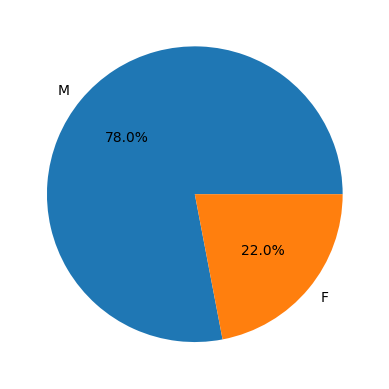

In [6]:
import matplotlib.pyplot as plt
plt.pie(df_proportion.proportion, labels = df_proportion.gender, autopct='%1.1f%%')
plt.show()

In [7]:
#Occupations of the People featured on banknotes.
Occupation = df.occupation.value_counts()
Occupation

,count
occupation,
Writer,45
Head of Gov't,38
Politician,27
Founder,25
Revolutionary,21
STEM,16
Military,13
Visual Artist,13
Musician,12


In [8]:
#What percentage of featured individuals are musicians?
Musician_count = Occupation['Musician']
Total = Occupation.sum()
Percent_of_musician = Musician_count/Total*100
print(Percent_of_musician)

4.979253112033195


In [9]:
#What percentage of banknotes were issued before the person’s death?
before_death = (df.first_death_diff < 0) | (df.first_death_diff.isna())
percentage = before_death.sum() / len(df) * 100
print(percentage)

4.564315352697095


In [10]:
#The oldest historical figure in the dataset?
oldest_figure = df.sort_values(by = 'first_appearance', ascending = True)
print(oldest_figure.iloc[0]['name'])

Thomas Jefferson


In [21]:
#Which countries feature the oldest historical figures on their banknotes?
#Top5 countries with the oldest historical figures:
print(df.groupby('country').death.median().sort_values(ascending = True).head(5))

country
South Korea              1560.5
São Tomé and Príncipe    1779.5
Ukraine                  1817.5
United States            1826.0
Bolivia                  1839.5
Name: death, dtype: float64


In [34]:
#What percentage of individuals died at least 100 years before appearing on a banknote?
percentage = (df['first_death_diff'] >= 100).sum() / df.shape[0] * 100
print(percentage)

33.19502074688796


In [42]:
#Which individuals appeared on a banknote just one year after their death?
after_one_yr =df[df['first_death_diff'] == 1]
after_one_yr['name']

,name
63,Gabriel García Márquez
173,General Murtala Mohammed
190,Corazon C. Aquino
191,Manuel A. Roxas
